In [1]:
import numpy as np
import scipy as sp

from tqdm.notebook import tqdm
from time import time

import matplotlib.pyplot as plt
from matplotlib import cm


%config InlineBackend.figure_format = 'svg'

In [2]:
def gen_random(m, n, spectrum):
    A = np.random.randn(m, m)
    U, _ = np.linalg.qr(A)
    
    B = np.random.randn(n, n)
    V, _ = np.linalg.qr(B)
    
    D  = np.zeros((m, n))
    np.fill_diagonal(D, spectrum)
    
    return U @ D @ V

def qr_rank(matrix, eps=1e-2):    
    _, r, _ = sp.linalg.qr(matrix, pivoting=True)
    
    r = r ** 2
    r = r.sum(1)
    
    r_cumsum = np.cumsum(r)
    r_cumsum /= r_cumsum[-1]
    
    k = np.where(r_cumsum >= 1 - eps)[0][0] + 1
    
    return k

def svd_rank(matrix, eps=1e-2):
    _, s, _ = sp.linalg.svd(matrix, full_matrices=False)
    
    s = s ** 2
    
    s_cumsum = np.cumsum(s)
    s_cumsum /= s_cumsum[-1]
    
    k = np.where(s_cumsum >= 1 - eps)[0][0] + 1
    
    return k
    

In [3]:
def timing(method):

    np.random.seed(42)
    results = []

    for idx, (N_row, M_row) in enumerate(zip(N, M)):
        res = []
        for n, m in zip(N_row, M_row):
            A = gen_random(n, m, np.ones(min(n, m)))

            s_t = time()
            method(A)
            e_t = time()

            res.append(e_t - s_t)
        results.append(res)
        
    return np.array(results)

In [4]:
n_grid = np.logspace(1, 3).astype(int)
m_grid = np.logspace(1, 3).astype(int)

N, M = np.meshgrid(n_grid, m_grid)

In [5]:
Z_svd = timing(svd_rank)

In [6]:
Z_qr = timing(qr_rank)

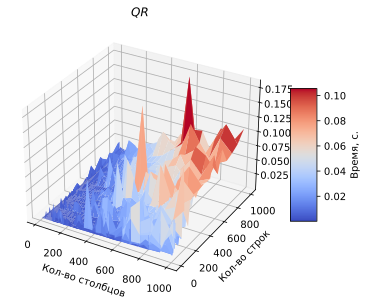

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(N, M, Z_qr, cmap= cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, label="Время, с.", shrink=0.5, aspect=5)

plt.xlabel("Кол-во столбцов")
plt.ylabel("Кол-во строк")
plt.title(f"$QR$")
plt.savefig("res_time1.svg")
plt.savefig("res_time1.png")
plt.show()

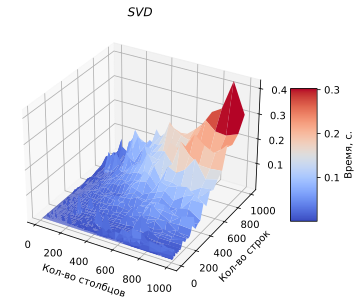

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(N, M, Z_svd, cmap= cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, label="Время, с.", shrink=0.5, aspect=5)

plt.xlabel("Кол-во столбцов")
plt.ylabel("Кол-во строк")
plt.title(f"$SVD$")
plt.savefig("res_time2.svg")
plt.savefig("res_time2.png")
plt.show()